In [1]:
# 주성분 분석용 패키지
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 
# 표준화 처리 패키지

In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\user\AppData\Local\Temp\ipykernel_1556\1737182394.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [3]:
plt.rcParams["figure.figsize"] = (20, 15)

In [4]:
train = pd.read_excel('우울_통계청_소계.xlsx')
train

,Unnamed: 0,구분,2018년소계,2019년소계,2020년소계,2021년소계,2022년소계,총계
0,0,도시(동부),7120,6632,6880,6296,6944,33872
1,1,농어촌(읍면부),7056,6640,7064,6496,7368,34624
2,2,남자,7128,6616,6904,6408,7080,34136
3,3,여자,7104,6672,6912,6248,6944,33880
4,4,19~29세,7192,6584,7104,6272,7224,34376
5,5,30~39세,7168,6624,6872,6464,6776,33904
6,6,40~49세,7096,6632,6880,6376,6992,33976
7,7,50~59세,7056,6760,6880,6344,7152,34192
8,8,60세 이상,7048,6552,6800,6192,6952,33544
9,9,전문관리,6784,6784,7240,6128,6656,33592


In [5]:
train.columns

Index(['Unnamed: 0', '구분', '2018년소계', '2019년소계', '2020년소계', '2021년소계',
       '2022년소계', '총계'],
      dtype='object')

In [6]:
train = train.drop(['Unnamed: 0'], axis=1)
train

,구분,2018년소계,2019년소계,2020년소계,2021년소계,2022년소계,총계
0,도시(동부),7120,6632,6880,6296,6944,33872
1,농어촌(읍면부),7056,6640,7064,6496,7368,34624
2,남자,7128,6616,6904,6408,7080,34136
3,여자,7104,6672,6912,6248,6944,33880
4,19~29세,7192,6584,7104,6272,7224,34376
5,30~39세,7168,6624,6872,6464,6776,33904
6,40~49세,7096,6632,6880,6376,6992,33976
7,50~59세,7056,6760,6880,6344,7152,34192
8,60세 이상,7048,6552,6800,6192,6952,33544
9,전문관리,6784,6784,7240,6128,6656,33592


In [7]:
train_x = train.copy()
# print(dp_6_train)
train_dum = pd.get_dummies(train_x.loc[0:10, :], drop_first=True, dtype='int')
print(train_dum)

    2018년소계  2019년소계  2020년소계  2021년소계  2022년소계     총계  구분_30~39세  구분_40~49세  \
0      7120     6632     6880     6296     6944  33872          0          0   
1      7056     6640     7064     6496     7368  34624          0          0   
2      7128     6616     6904     6408     7080  34136          0          0   
3      7104     6672     6912     6248     6944  33880          0          0   
4      7192     6584     7104     6272     7224  34376          0          0   
5      7168     6624     6872     6464     6776  33904          1          0   
6      7096     6632     6880     6376     6992  33976          0          1   
7      7056     6760     6880     6344     7152  34192          0          0   
8      7048     6552     6800     6192     6952  33544          0          0   
9      6784     6784     7240     6128     6656  33592          0          0   
10     7144     6512     7072     6376     7040  34144          0          0   

    구분_50~59세  구분_60세 이상  구분_남자  구분_농어촌

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\

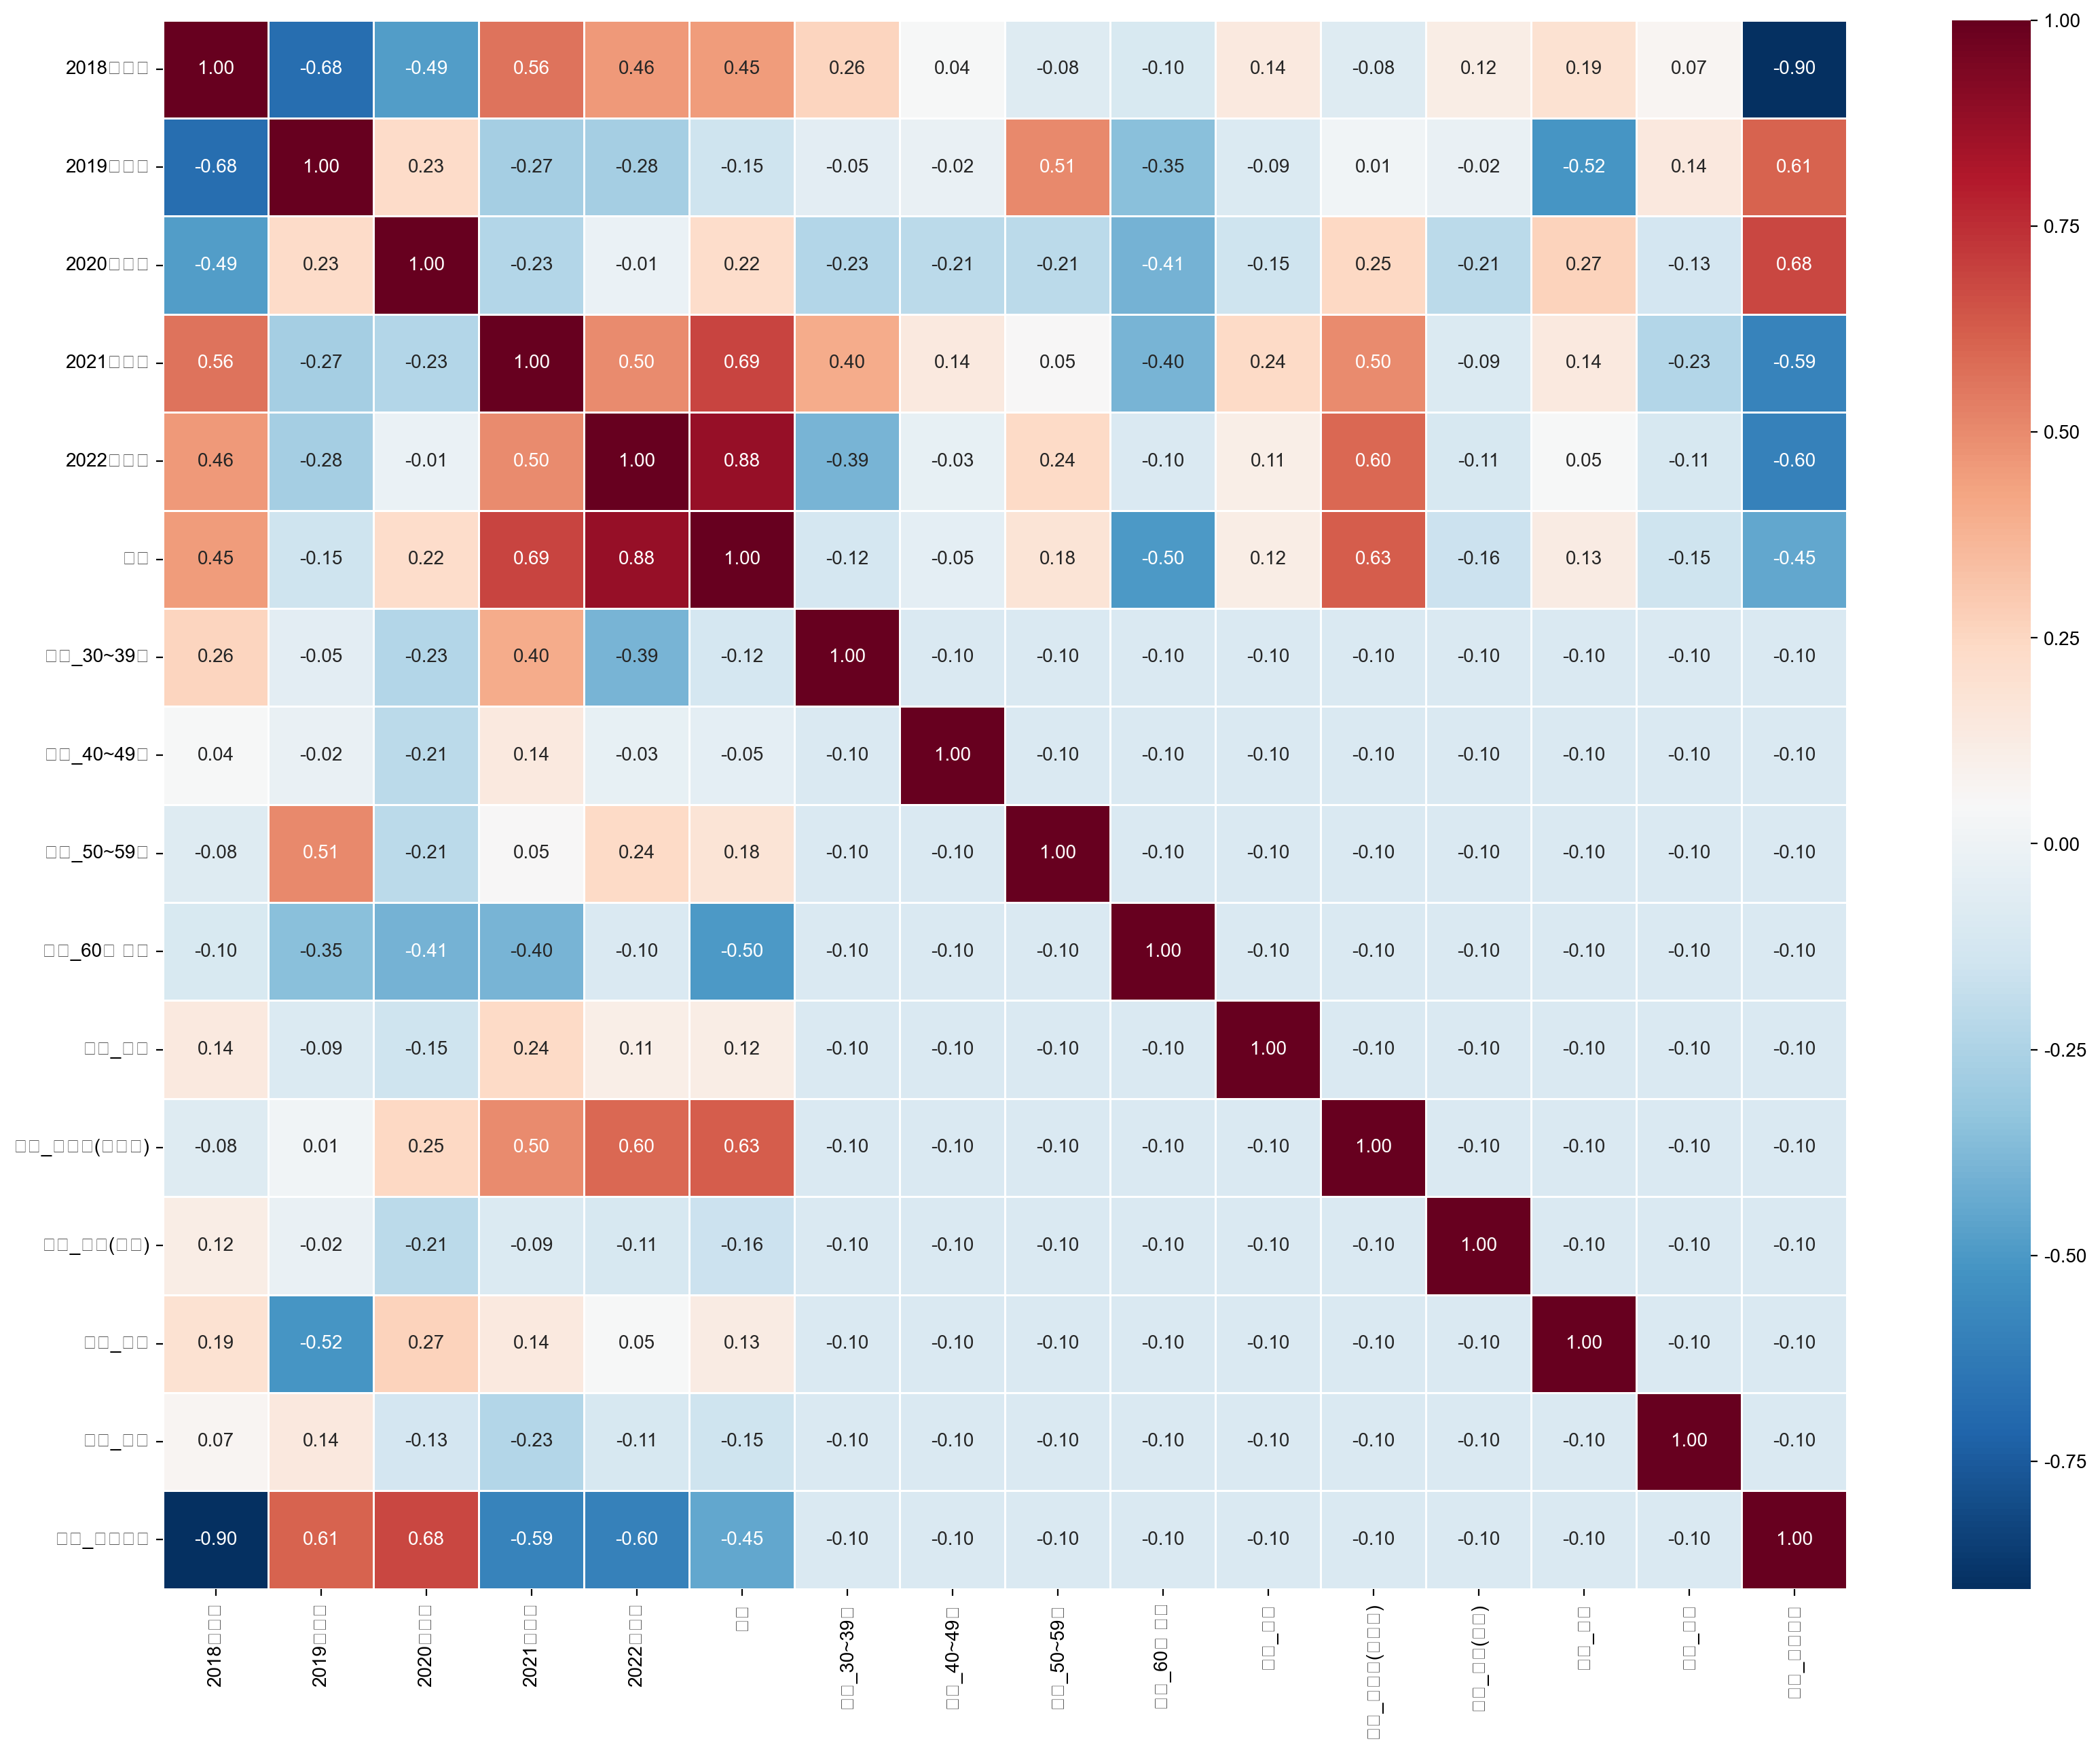

In [8]:
sns.heatmap(data = train_dum.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')
plt.show()

In [9]:
train_x = train.copy()
# print(dp_6_train)
train_dum = pd.get_dummies(train_x.loc[10:20, :], drop_first=True, dtype='int')
print(train_dum)

    2018년소계  2019년소계  2020년소계  2021년소계  2022년소계     총계  구분_100만원 미만  \
10     7144     6512     7072     6376     7040  34144            0   
11     7160     6616     6960     6256     7048  34040            0   
12     7240     7096     6856     6392     7560  35144            0   
13     7080     6512     6712     6592     6920  33816            0   
14     6456     6360     6344     5624     6672  31456            1   
15     6976     6536     6384     6352     6984  33232            0   
16     7008     6552     6736     6176     7056  33528            0   
17     7232     6680     7008     6608     6968  34496            0   
18     7184     6792     7120     6528     7200  34824            0   
19     7384     6752     7064     6376     7048  34624            0   
20     7000     6560     7080     6232     6952  33824            0   

    구분_200~300만원 미만  구분_300~400만원 미만  구분_400~500만원 미만  구분_500~600만원 미만  \
10                0                0                0                0   

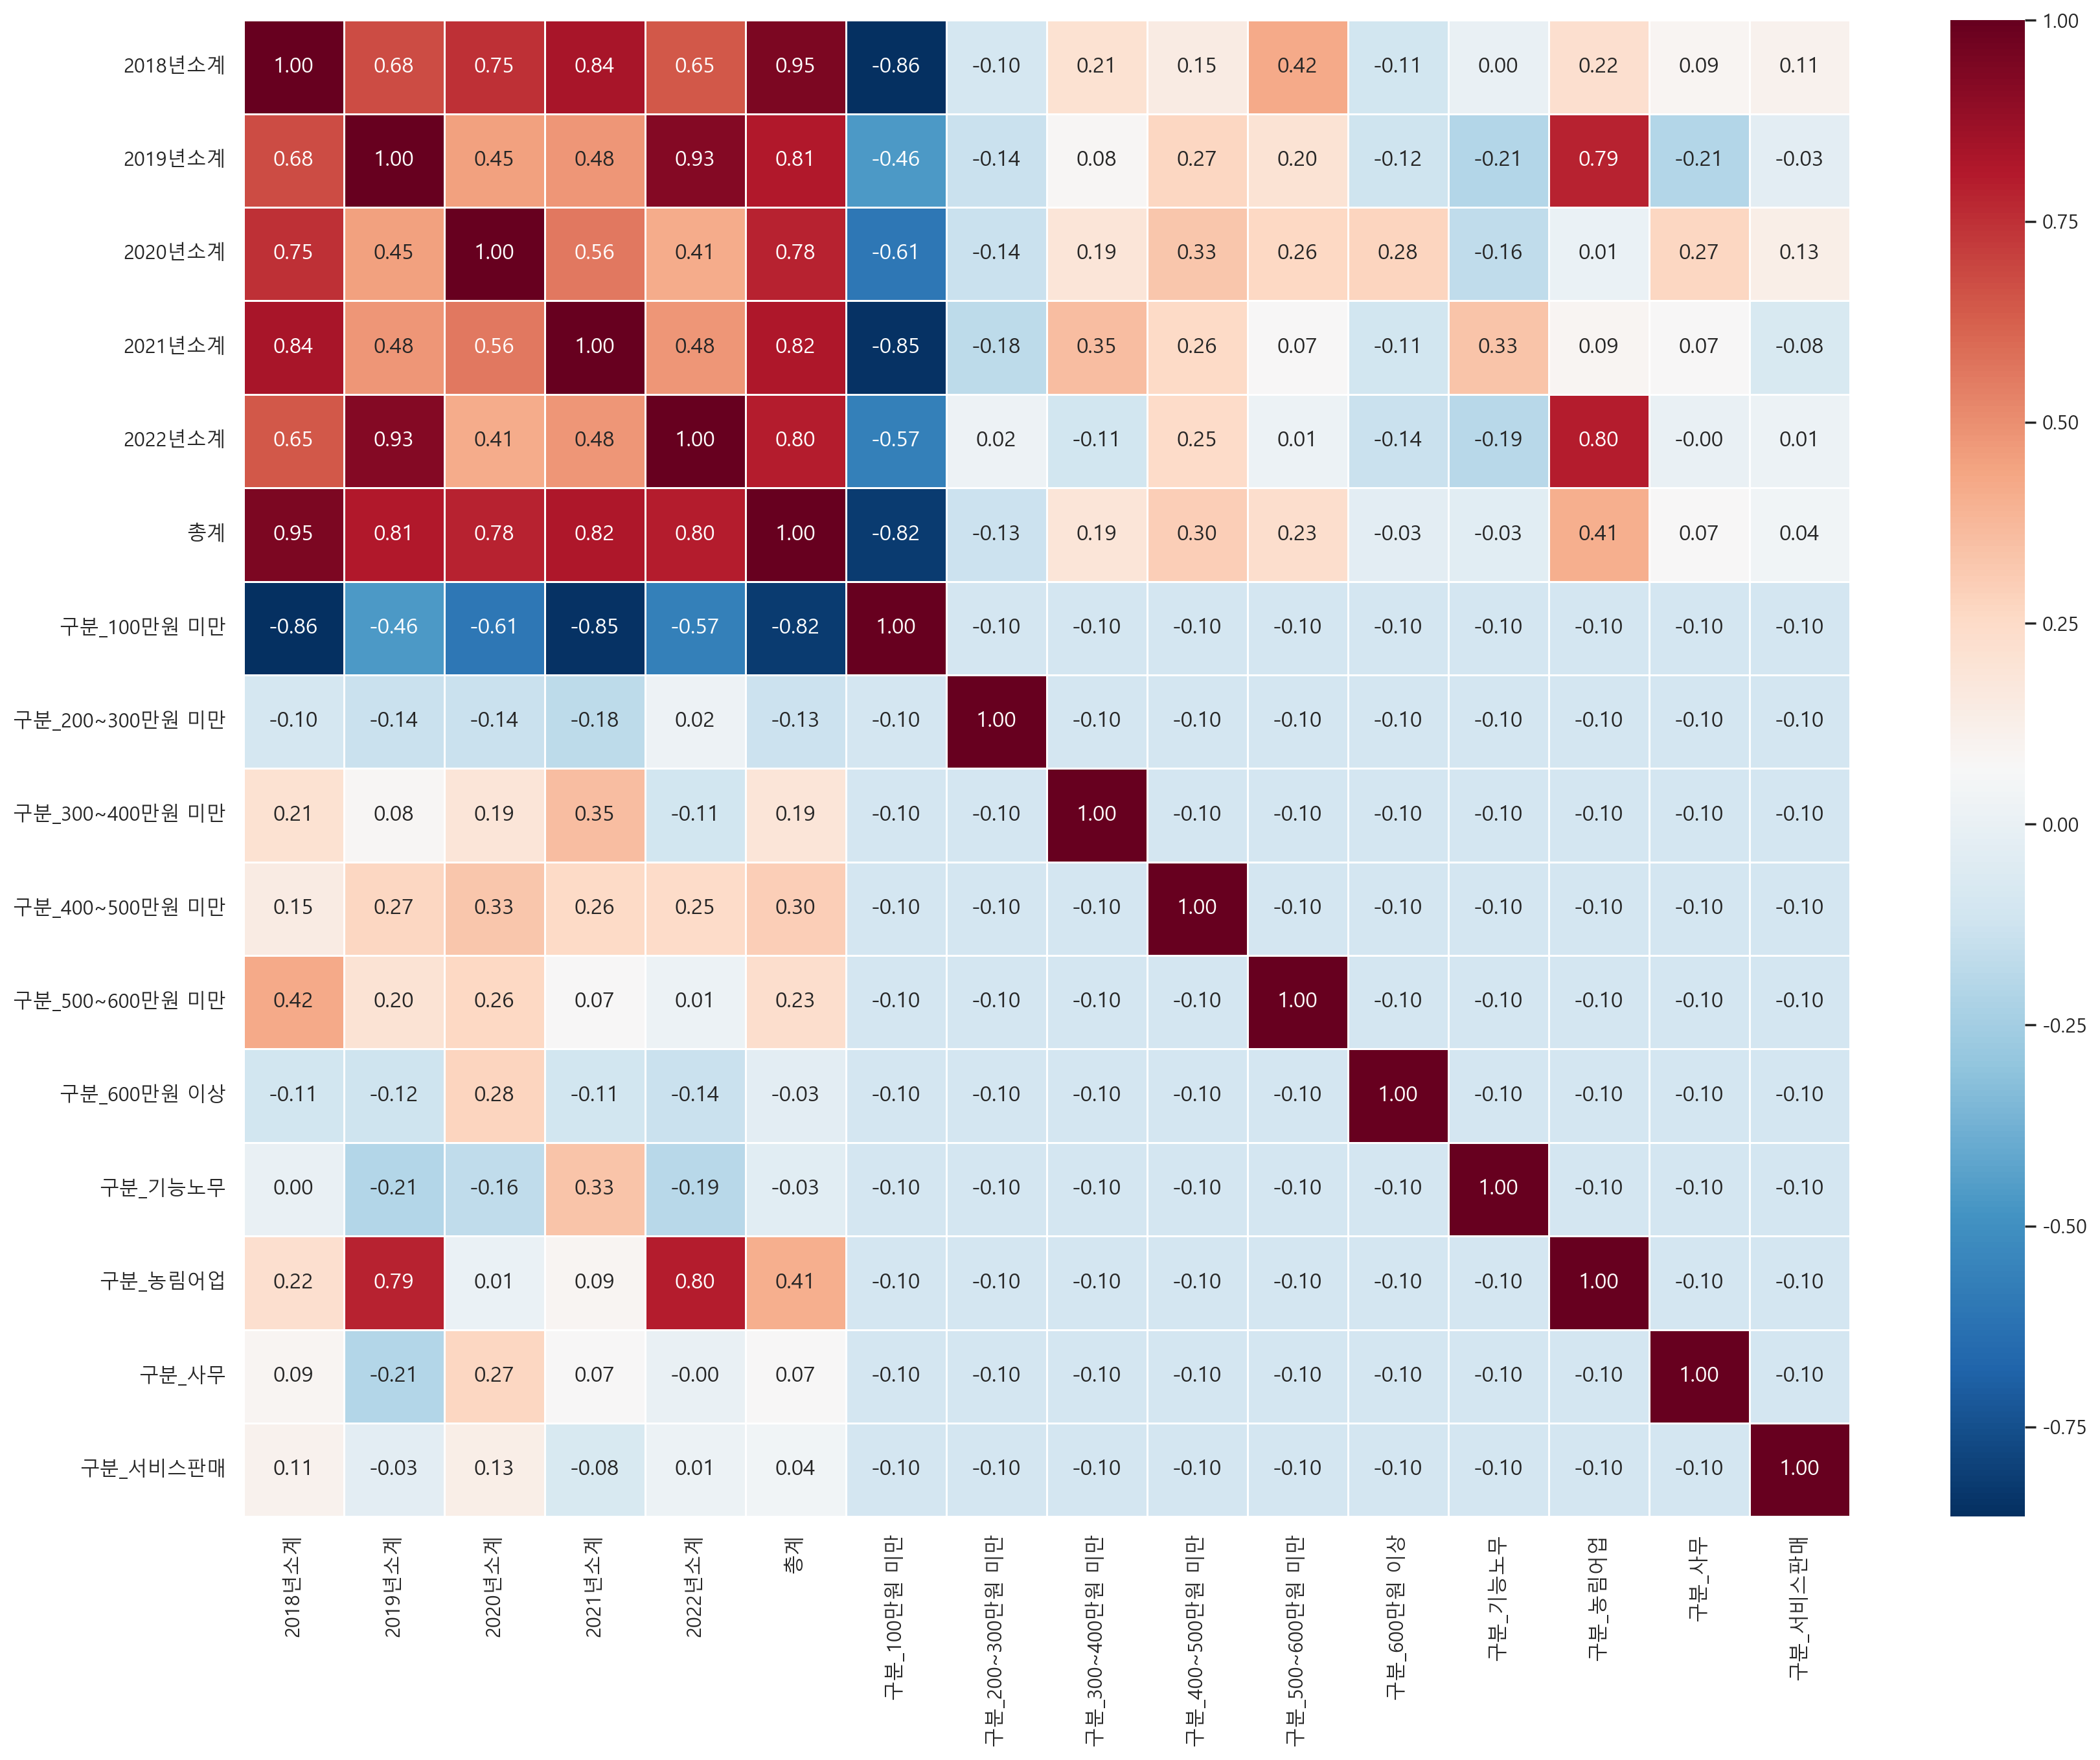

In [10]:
sns.heatmap(data = train_dum.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')
plt.show()

In [11]:
train_x = train.copy()
# print(dp_6_train)
train_dum = pd.get_dummies(train_x.loc[20:, :], drop_first=True, dtype='int')
print(train_dum)

    2018년소계  2019년소계  2020년소계  2021년소계  2022년소계     총계  구분_고졸  구분_대졸 이상  \
20     7000     6560     7080     6232     6952  33824      0         0   
21     6656     6504     6616     6448     7016  33240      0         0   
22     7056     6368     6720     6264     7064  33472      0         0   
23     7208     6664     6824     6248     7024  33968      1         0   
24     7072     6648     7080     6376     7000  34176      0         1   

    구분_중졸  구분_초졸 이하  
20      0         0  
21      0         1  
22      1         0  
23      0         0  
24      0         0  


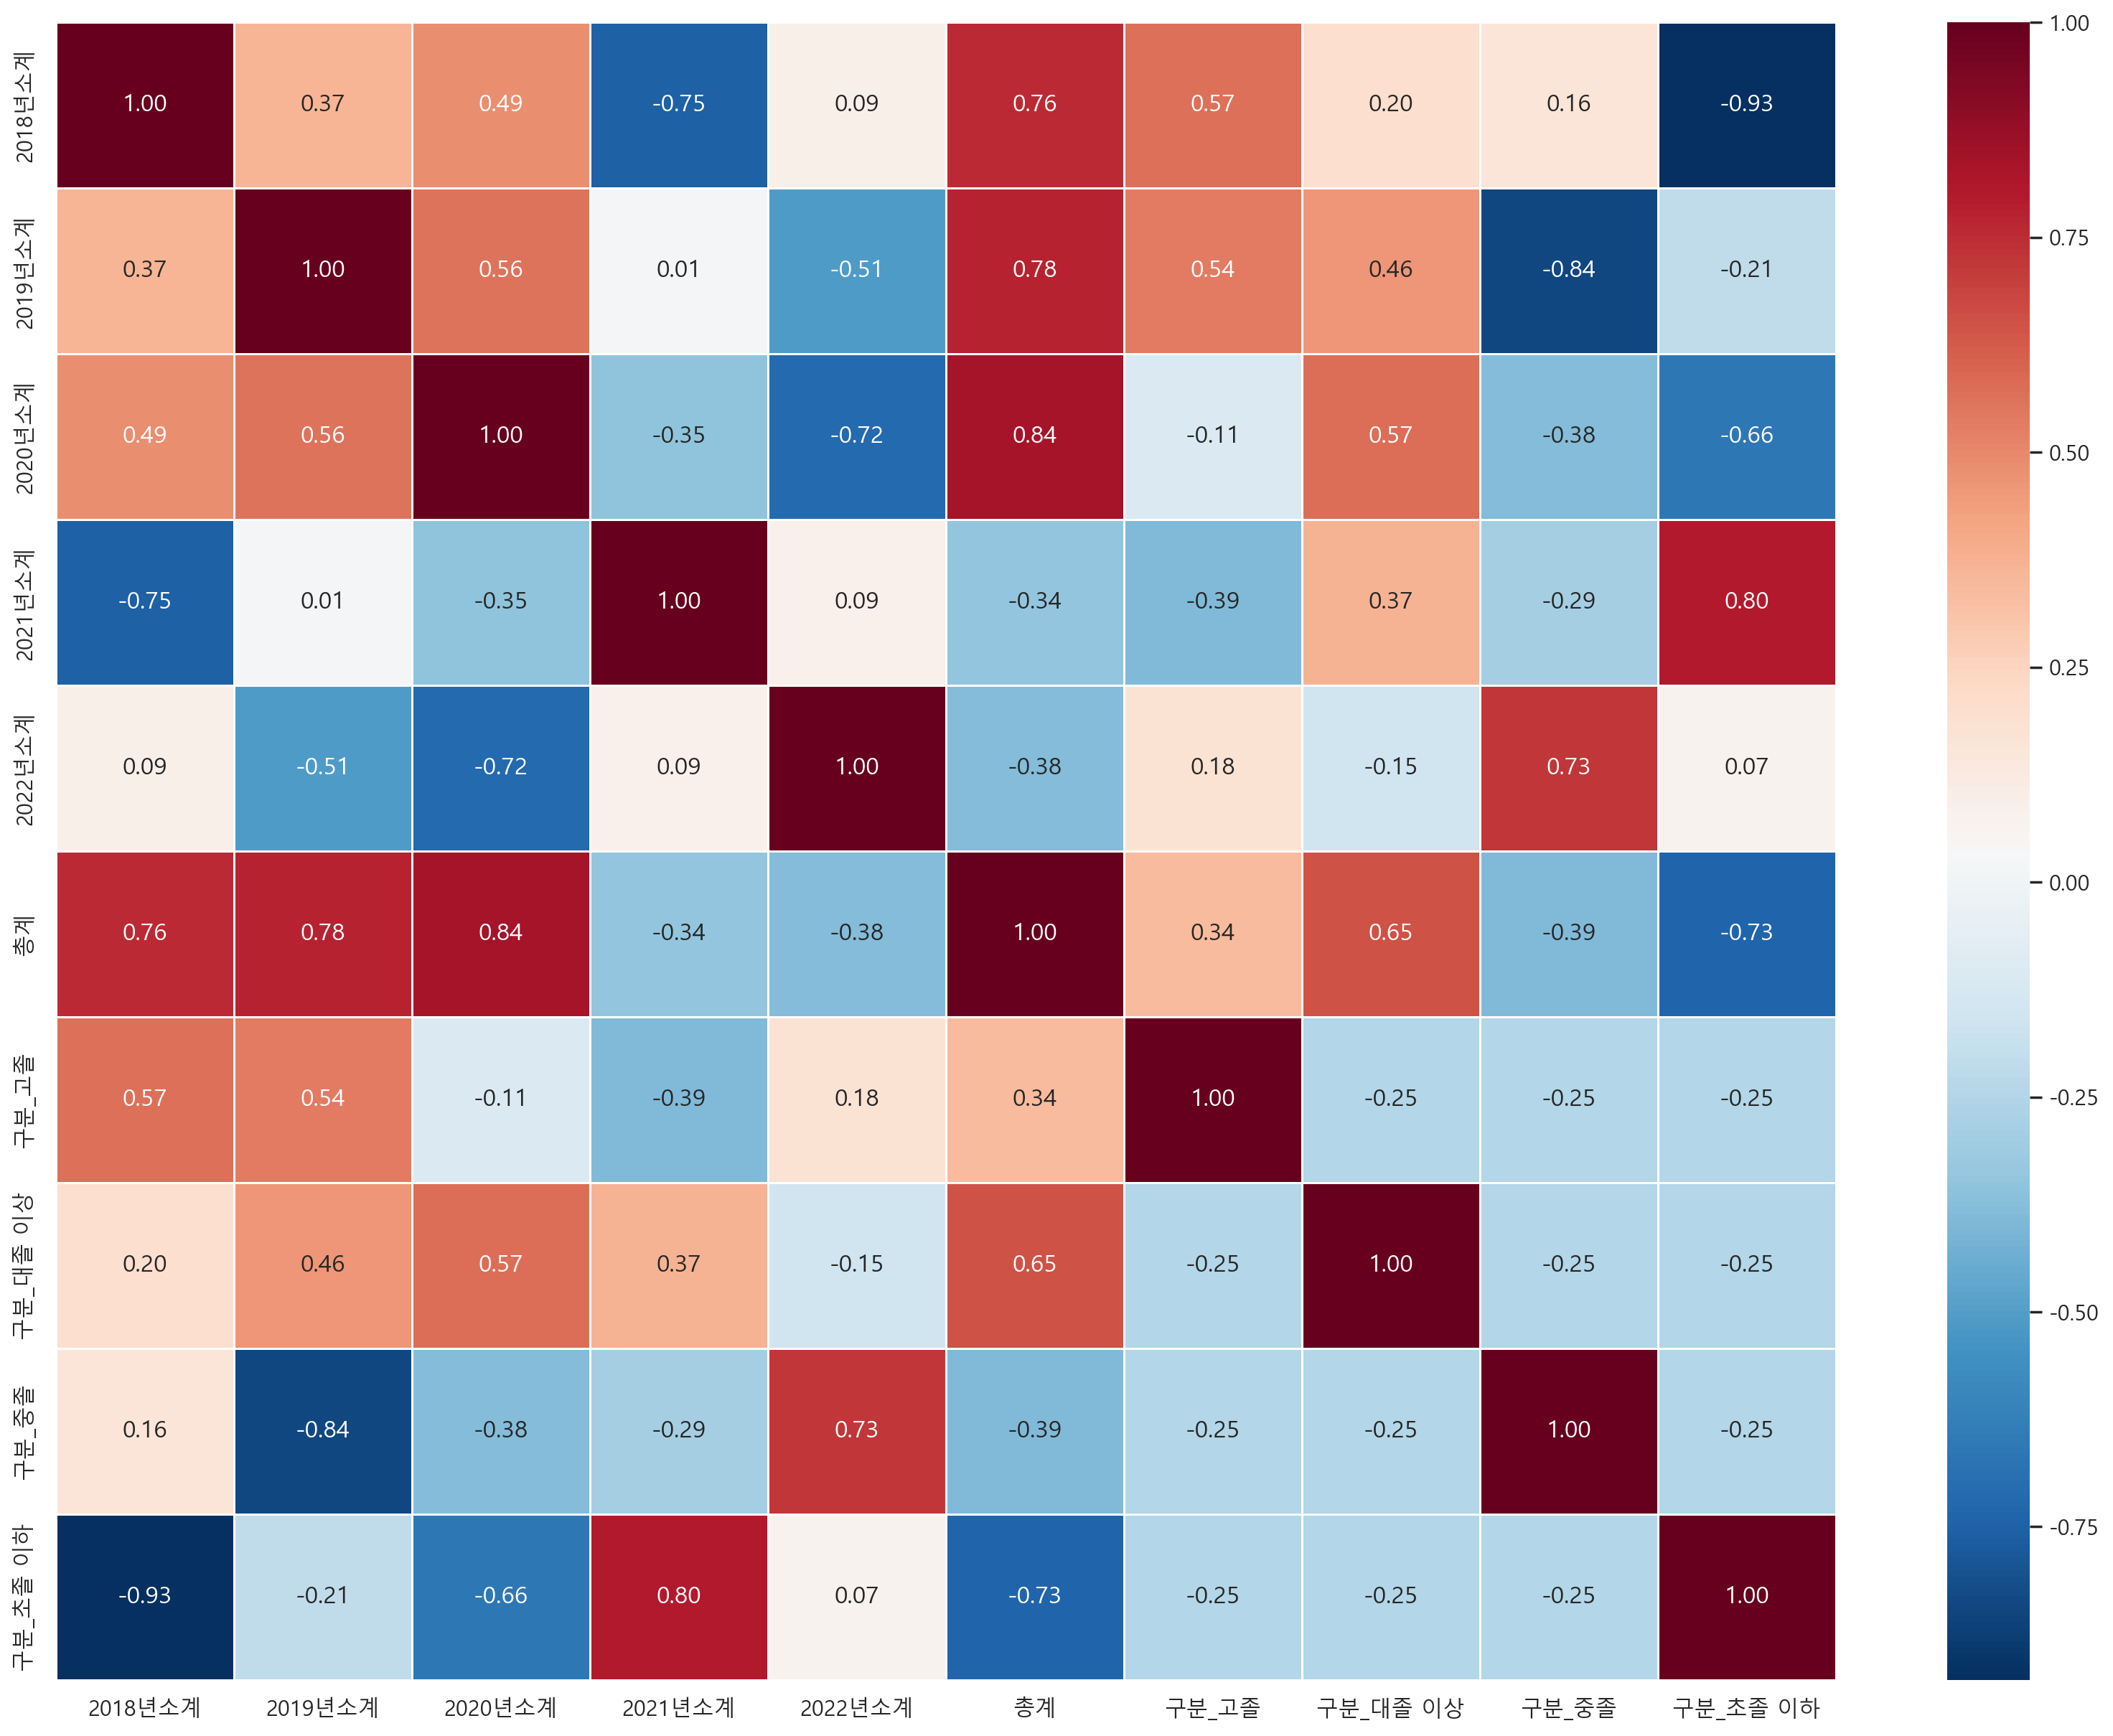

In [12]:
sns.heatmap(data = train_dum.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')
plt.show()